**Link:https://colab.research.google.com/drive/1PQOG_IhviO0ahaH2ZoOIxbDbir0s2xMx?usp=sharing **

# **Forecasting Airline Ticket Prices**

Team B06:
```
Mingshu Hong
Chenhui Shen
Zeran Huang
Zicheng Wang

```





---

## **Project Overview**

### **Introduction**





The project aims to predict flight prices for domestic routes using historical data. By analyzing variables such as departure date, airline, flight duration, and other relevant factors, the goal is to develop a predictive model capable of accurately estimating ticket prices. This model will help travelers plan cost-effective journeys by identifying the optimal time to purchase tickets. Additionally, it will enable airlines and travel agencies to implement competitive pricing strategies. Addressing this challenge offers practical benefits for the travel industry, benefiting both consumers and service providers by improving pricing decisions and enhancing travel planning.

### **Data Source**

The "US Airline Flight Routes and Fares (1993-2024)" dataset was collected from Kaggle includes detailed data on U.S. airline flights and ticket prices.

**About Dataset:**
Includes over 23 columns and 246,000 rows

**Table Dictionary**



| Column Name        | Description                                      |
|---------------------|--------------------------------------------------|
| tbl                | Table identifier                                 |
| Year               | Year of the data record                          |
| quarter            | Quarter of the year (1-4)                        |
| citymarketid_1     | Origin city market ID                            |
| citymarketid_2     | Destination city market ID                       |
| city1              | Origin city name                                 |
| city2              | Destination city name                            |
| airportid_1        | Origin airport ID                                |
| airportid_2        | Destination airport ID                           |
| airport_1          | Origin airport code                              |
| airport_2          | Destination airport code                         |
| nsmiles            | Distance between airports in miles              |
| passengers         | Number of passengers                             |
| fare               | Average fare                                     |
| carrier_lg         | Code for the largest carrier by passengers       |
| large_ms           | Market share of the largest carrier (%)          |
| fare_lg            | Average fare of the largest carrier              |
| carrier_low        | Code for the lowest fare carrier                 |
| lf_ms              | Market share of the lowest fare carrier (%)      |
| fare_low           | Lowest fare                                      |
| Geocoded_City1     | Geocoded coordinates for the origin city         |
| Geocoded_City2     | Geocoded coordinates for the destination city    |
| tbl1apk            | Unique identifier for the route                  |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno




### **Data Cleaning**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/US Airline Flight Routes and Fares 1993-2024.csv')
print(data.head())
print(data.info())

<ipython-input-6-359cb7042fdb>:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/US Airline Flight Routes and Fares 1993-2024.csv')


       tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
0        14112       ABE  ...   81.43          G4    1.0000    81.43   
1 

**Use the missing data matrix to visually identify missing values in the dataset**

<Figure size 1000x200 with 0 Axes>

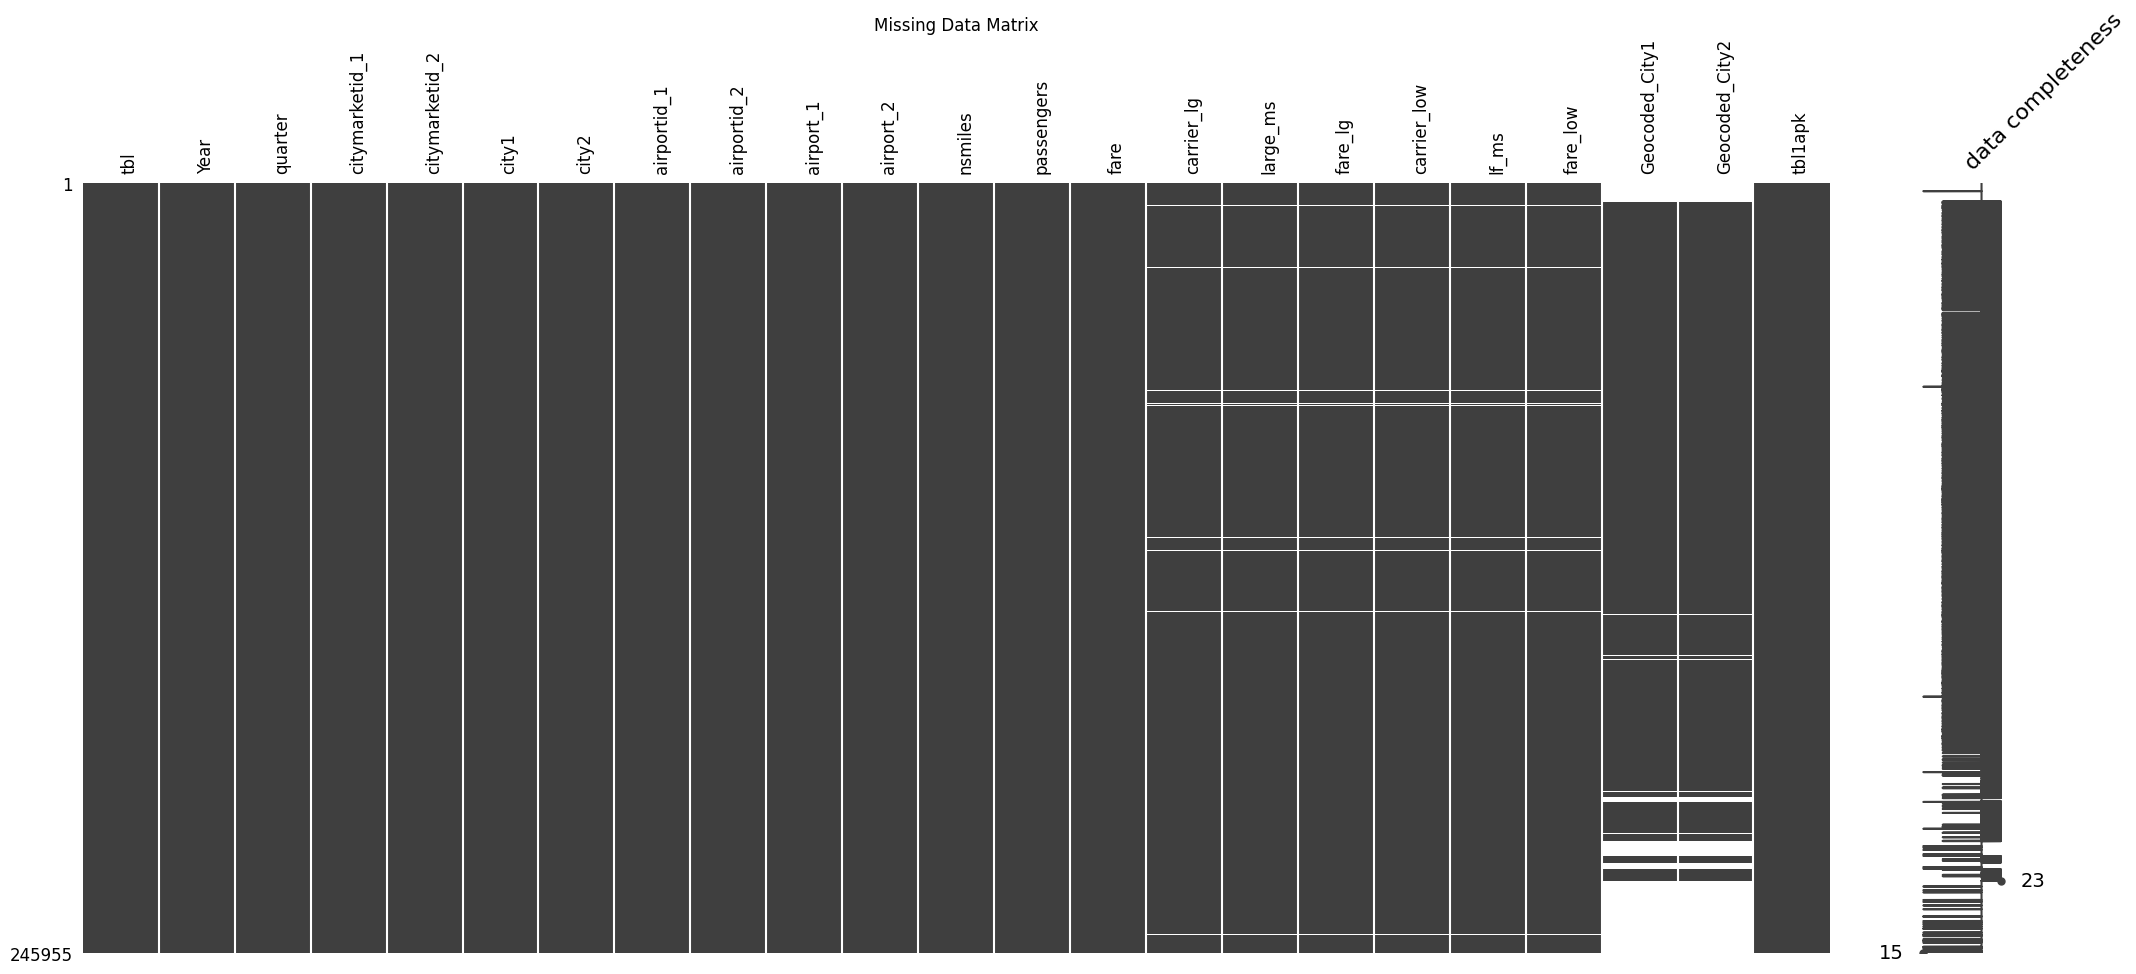

In [ ]:
plt.figure(figsize=(10, 2))
msno.matrix(data, labels=True)
plt.title('Missing Data Matrix')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

**Check null value and change aiportid_1 and 2 data type**

In [ ]:
missing_values = data.isnull().sum()
print("missing_values")
print(missing_values)

data['airportid_1'] = data['airportid_1'].astype('category')
data['airportid_2'] = data['airportid_2'].astype('category')
print(data.dtypes)


missing_values
tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64
tbl                 object
Year                 int64
quarter              int64
citymarketid_1       int64
citymarketid_2       int64
city1               object
city2               object
airportid_1       category
airportid_2       category
airport_1           object
airport_2           object
nsmiles              int64
passengers           int64
fare               float64
carrier_lg          object
large_ms       

**Drop unnecessary columns, use data only after 2014, and fill in null value with mean in large_ms and lf_ms**

In [ ]:
columns_to_remove = ['fare_lg', 'fare_low', 'carrier_lg', 'carrier_low', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk', 'tbl', 'city1', 'city2', 'airport_1', 'airport_2']
data_cleaned = data.drop(columns=columns_to_remove, errors='ignore')

data_cleaned = data_cleaned[data_cleaned['Year'] >= 2014].reset_index(drop=True)
print(data_cleaned.shape)

data_cleaned['large_ms'].fillna(data_cleaned['large_ms'].mean(), inplace=True)
data_cleaned['lf_ms'].fillna(data_cleaned['lf_ms'].mean(), inplace=True)
print(data_cleaned.isnull().sum())


(81961, 11)
Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
airportid_1       0
airportid_2       0
nsmiles           0
passengers        0
fare              0
large_ms          0
lf_ms             0
dtype: int64


<ipython-input-9-5cb186931640>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['large_ms'].fillna(data_cleaned['large_ms'].mean(), inplace=True)
<ipython-input-9-5cb186931640>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

**Description**

We drop 'fare_lg', 'fare_low', 'carrier_lg', 'carrier_low', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk', 'tbl', 'city1', 'city2', 'airport_1', 'airport_2', Because most of these column are categorical features which are not practical for price prediction. And for locartion, we only retain airportid column, Because the airport id and the city are in a subordinate relationship, a city may have more than one airport, but each airport would implies an origin or destination for a particular city. Also airpotid have same effect with Geocoded. For dropping fare_lg(avg_fare of large carrier) and fare_low(lowest_fare), cause it have same character of average fare, it need to be predicted and can't get noticed before average fare.

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81961 entries, 0 to 81960
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            81961 non-null  int64   
 1   quarter         81961 non-null  int64   
 2   citymarketid_1  81961 non-null  int64   
 3   citymarketid_2  81961 non-null  int64   
 4   airportid_1     81961 non-null  category
 5   airportid_2     81961 non-null  category
 6   nsmiles         81961 non-null  int64   
 7   passengers      81961 non-null  int64   
 8   fare            81961 non-null  float64 
 9   large_ms        81961 non-null  float64 
 10  lf_ms           81961 non-null  float64 
dtypes: category(2), float64(3), int64(6)
memory usage: 6.0 MB


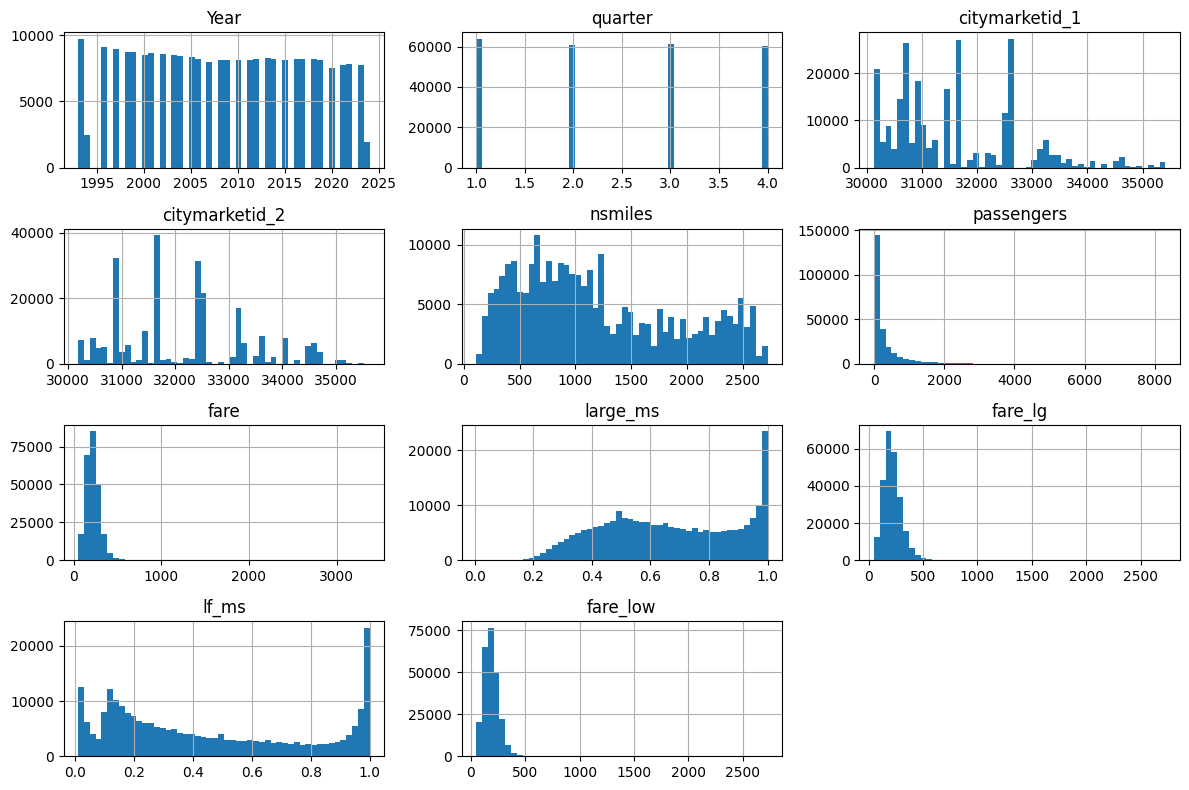

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

**Description**

The histograms show that most variables, such as **fare** and **passengers**, are **right-skewed**, meaning most values are lower with a few high-value outliers.  Key features like **nsmiles** and **fare** show clear trends, with most flights being short to medium distances and fares mostly under **$500**. Variables like large_ms and lf_ms highlight differences in market share between large and low-fare carriers. The even distribution of Year and Quarter ensures balanced data over time for analysis.

  **Identify fare as target variable**

In [ ]:
# Identify features and target variable
X = data_cleaned.drop(columns=['fare'])
y = data_cleaned['fare']

# check variable shape
print(f"X_features:{X.shape}")
print(f"y_feature:{y.shape}")


X_features:(81961, 10)
y_feature:(81961,)


### **Feature Selection**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initial Randdomforest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X, y)

# Feature selection to see importance of each variable
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

# Select of the first six features
selected_features = feature_importances.head(6)['Feature'].tolist()
print(f"feature selection:{selected_features}")


          Feature  Importance
6         nsmiles    0.387919
7      passengers    0.132766
0            Year    0.116779
9           lf_ms    0.069791
4     airportid_1    0.058939
8        large_ms    0.058619
5     airportid_2    0.057032
1         quarter    0.040381
2  citymarketid_1    0.039015
3  citymarketid_2    0.038760
feature selection:['nsmiles', 'passengers', 'Year', 'lf_ms', 'airportid_1', 'large_ms']


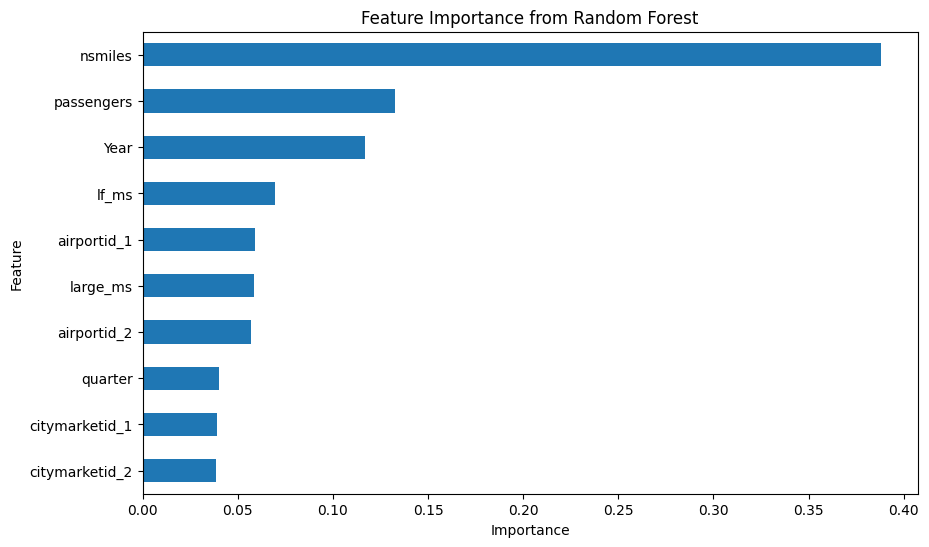

In [ ]:
# Visualize feature importance plot
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)
feature_importances.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), legend=False)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Choose Top 6 features**

In [ ]:
from sklearn.model_selection import train_test_split
X_selected = data_cleaned[selected_features]
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print(f"Size of train set:{X_train.shape}, Size of test set: {X_test.shape}")


Size of train set:(65568, 6), Size of test set: (16393, 6)


### **Create Pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
from sklearn.pipeline import make_pipeline


#Define numeircal and categorical features
numerical_features = ['Year', 'nsmiles', 'passengers', 'lf_ms', 'large_ms']
categorical_features = ['airportid_1']

#Create columntransformer prepocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_features)
    ]
)

# Create Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Set diagram of pipeline
set_config(display='diagram')

# Show Pipeline
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'nsmiles',
                                                   'passengers', 'lf_ms',
                                                   'large_ms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['airportid_1'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
print("Column name of train set", X_train.columns.tolist())
print("Column name of test set", X_test.columns.tolist())


Column name of train set ['nsmiles', 'passengers', 'Year', 'lf_ms', 'airportid_1', 'large_ms']
Column name of test set ['nsmiles', 'passengers', 'Year', 'lf_ms', 'airportid_1', 'large_ms']


**Fit Pipeline**

In [ ]:
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Predict using the test set
y_pred = rf_pipeline.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Model Mean Squared Error (MSE): {mse}")
print(f"Optimized Model R² Score: {r2}")

Optimized Model Mean Squared Error (MSE): 1768.7082302059277
Optimized Model R² Score: 0.6918796598512692


**Description**

We firstly categorize numeric and category features, and then create a column transformer pipeline to fit the randomforest model. From the output of random forest model, we can see that Mean square error is around 1768. And r-square score is around 0.69. which menas that this model can predict 69% variance of flight fare. We will try if there are anyother models can have better performance and through tuning parameters of the model.

### **Fine tune the model**

Use GridSearchCV to optimize the parameters of a random forest model, evaluates its performance on the test set, and reports the best parameters, mean squared error (MSE), and R² score.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Identify parameter range
param_grid = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [None],
    'model__min_samples_split': [7, 10],
    'model__min_samples_leaf': [1, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=2, n_jobs=-1)

# Execute Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters set and its score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")

# best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluete model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 7, 'model__n_estimators': 300}
Best MSE: 1684.515276359192
(MSE): 1716.6092281507413
R² 分数: 0.700955640818907


**Description**

The GridSearchCV process for the random forest model identified the best parameters set, which include n_estimators of 300, min_samples_split of 7, and min_samples_leaf of 1. The best model achieved a Mean Squared Error of 1684.52, and the R² score of 0.7009, showing that tuned random forest model is effective in predicting flight prices, but further feature engineering may be required to enhance the performance.

**Compare the model's predicted values against the actual values**

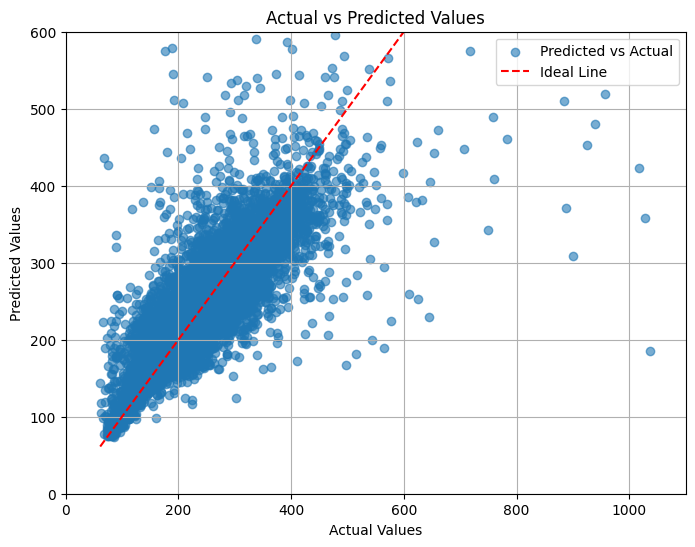

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to show actual and predict values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Line")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim([0, 1100])
plt.ylim([0, 600])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression model
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train Linear Regression
lr_model.fit(X_train, y_train)

# Test test_set
y_pred_lr = lr_model.predict(X_test)

# Evaluete model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression Model R² Score: {r2_lr}")


Linear Regression Model Mean Squared Error (MSE): 3457.967167220596
Linear Regression Model R² Score: 0.39759989715030486


**Description**

The Linear Regression Model achieved a Mean Squared Error of **3457.97**, which is higher than the Gradient Boosting Model's MSE, indicating that the flight price predictions from this model deviate more from the actual ticket prices on average. The R² score of **0.3976** shows that the model only explains 39.76%  of the variance in ticket prices, which is relatively low. This suggests that Linear Regression is less effective for predicting flight prices, likely due to the presence of non-linear relationships or complex patterns in the data, such as the effects of seasonality, competition, or booking timing, which it cannot fully capture.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create Gradient Boosting model
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=5))
])

# Train Gradient Boosting model
gb_model.fit(X_train, y_train)

# predict test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate its performace
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Model Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting Model R² Score: {r2_gb}")


Gradient Boosting Model Mean Squared Error (MSE): 2172.0769651701453
Gradient Boosting Model R² Score: 0.6216102340070375


**Description**

Gradient Boosting Model achieved a Mean Squared Error of **2172.08**, indicating the average squared difference between predicted and actual flight prices. The R² score of **0.6216** suggests that the model explains approximately 62.16% of the variance in the "fare" variable, which is moderate but can be improved. The results indicate that the model performs fairly well but could improve with additional feature engineering to enhance its predictive accuracy.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

X_train['airportid_1'] = X_train['airportid_1'].astype('category')
X_test['airportid_1'] = X_test['airportid_1'].astype('category')

# Create XGBoost model
xgb_model = xgb.XGBRegressor(
    random_state=42,
    enable_categorical=True,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1
)

# Train model
xgb_model.fit(X_train, y_train)

# Prediction with test set
y_pred_xgb = xgb_model.predict(X_test)

# Performance evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Model R² Score: {r2_xgb}")


XGBoost Model Mean Squared Error (MSE): 1736.8776669488134
XGBoost Model R² Score: 0.6974247485269554


**Description**

The XGBoost Model achieved a Mean Squared Error of **1736.88**, indicating that the predicted flight prices are closer to the actual values on average. The R² score of **0.6974** shows that the model explains approximately 69.74% of the variance in ticket prices, better than both the Gradient Boosting and Linear Regression models.

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42, enable_categorical=True)

# Change parameters set to search
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1.0],
    'reg_lambda': [1.0, 10.0]
}

# Create GridSearchCV oject
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=2,
    n_jobs=-1)

# Grid search
grid_search.fit(X_train, y_train)

# Best set and cooresponding score
print(f"Best_parameter: {grid_search.best_params_}")
print(f"Best_MSE: {-grid_search.best_score_}")

best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)

# Perfomance Evaluation
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best XGBoost Model Mean Squared Error (MSE): {mse_best}")
print(f"Best XGBoost Model R² Score: {r2_best}")


Fitting 2 folds for each of 128 candidates, totalling 256 fits
Best_parameter: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 1.0}
Best_MSE: 1630.7657107800958
Best XGBoost Model Mean Squared Error (MSE): 1660.0802276441104
Best XGBoost Model R² Score: 0.7108033559857795


**Description**

The best model achieved a Mean Squared Error of **1660.08**, which is lower than the default XGBoost, indicating improved performance. The R² score of 0.7108 shows that the tuned model explains **71.08%** of the variance in ticket prices. This demonstrates that fine-tuning the XGBoost model significantly enhances its ability to predict flight prices accurately.

### **Conclusion**

Summary and Conclusion
In our project, we ultimately selected the XGBoost model due to its superior accuracy compared to the other models we tested. Our primary goal was to predict airfare using the average ticket price (fare) as the target variable. This allowed us to provide a reliable estimate of ticket prices based on key features.
To ensure accuracy and efficiency, we only utilized data from 2014 onward. Earlier data showed significant fare fluctuations and added excessive noise to the predictions. Additionally, the size of the dataset before 2014 made running complex models computationally challenging. By limiting the dataset, we were able to refine our analysis and enhance performance.
We conducted a comprehensive comparison across four machine learning models, and XGBoost consistently delivered the best results. Our findings suggest that the predicted airfare can serve as a practical reference for decision-making. For instance, if the real-time ticket price is significantly lower than the predicted fare, it may indicate an ideal opportunity to purchase tickets.
Additionally, we initially experimented with models including fare_lg (the fare of the largest carrier) and fare_low (the fare of the cheapest), which achieved an impressive 85% accuracy. However, after careful investigation, we determined these features were not suitable predictors. Both fare_lg and fare_low are inherently correlated with the target variable fare, as they are derived from the same calculations. Consequently, we excluded these features to ensure our model's integrity and avoid overfitting.
In conclusion, this project provides a solid framework for predicting ticket prices and offers actionable insights for travelers looking to identify the best times to book flights.

### **Generative AI Disclosure Statement**

*In this project, we used generative AI tools to assist us in various aspects of our work. We used ChatGPT to help us understand the logic of different Machine learning models and how it works. In addition, we referenced the lab notebook for modeling and fine tuning.*

*We also used Gemini's suggestions for debugging and reviewing coding for accuracy, including optimizing algorithms and addressing potential errors.*
